#### Min-max optimal L for uncertain first-order system

In [1]:
import os
if os.path.basename(os.getcwd()) != 'Learning-Dynamic-Systems': os.chdir(".\\..") 

from optimal_controller.optimal_controls import *
import numpy as np
import matplotlib.pyplot as plt

# Reference tracking simulation for single (a,b)
def run_sim(t, a, b, k, ref, L):
    u = np.zeros_like(t)
    x = np.zeros_like(t)
    for i in range(len(t) - 1):
        u[i] = -k * x[i] + L * ref[i]
        x[i + 1] = a * x[i] + b * u[i]
    return u, x

# Reference tracking simulation across set of (a,b)
def ref_tracking(a, b, k, L):
    Ts = 0.01
    t = np.arange(0, 10 + Ts, Ts)
    ref = 0.5 + (np.sin(2 * np.pi / 5 * t) < 0).astype(float)  # square wave
    U = np.zeros((len(a), len(t)))
    X = np.zeros((len(a), len(t)))
    for i in range(len(a)):
        U[i, :], X[i, :] = run_sim(t, a[i], b[i], k, ref, L)
    return X, U, t, ref
    

In [2]:
# Example of computing optimal L for a single (a,b) under feedback k

a = 0.92
b = 0.1
k = 0.929
L, _, _ = compute_optimal_L([a], [b], k)
L

init_L = 1.7289999999999994
init_J = 0.0
opt_L = 1.7289999999999994
opt_J = 0.0


np.float64(1.7289999999999994)

In [16]:
# Example of computing optimal L for a set of (a,b) under feedback k

N = 100
a_set = 0.92 + 0.05 * np.random.randn(N)
b_set = 0.1 + 0.01 * np.random.randn(N)
a_set = np.reshape(a_set, (N,1,1))
b_set = np.reshape(a_set, (N,1,1))
k = 0.929

opt_L, opt_J, _ = compute_optimal_L(a_set, b_set, k)

init_L = 1.018817310961942
init_J = [[0.174]]
opt_L = 1.036726209006195
opt_J = [[0.159]]


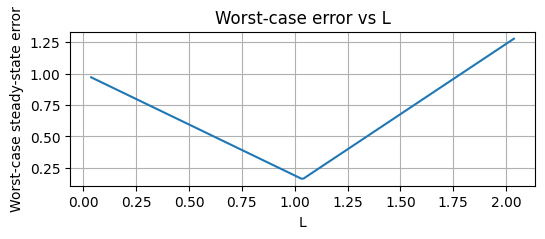

In [17]:
# Plot loss landscape

Lvals = np.linspace(opt_L - 1, opt_L + 1, 200)
Jvals = np.array([compute_worst_reference_tracking_error(L, a_set, b_set, k) for L in Lvals]).flatten()

plt.figure(figsize=(6, 2))
plt.plot(Lvals, Jvals)
plt.xlabel("L")
plt.ylabel("Worst-case steady-state error")
plt.title("Worst-case error vs L")
plt.grid(True)
plt.show()

C:\Users\conor\AppData\Local\Temp\ipykernel_8052\3928307372.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i + 1] = a * x[i] + b * u[i]


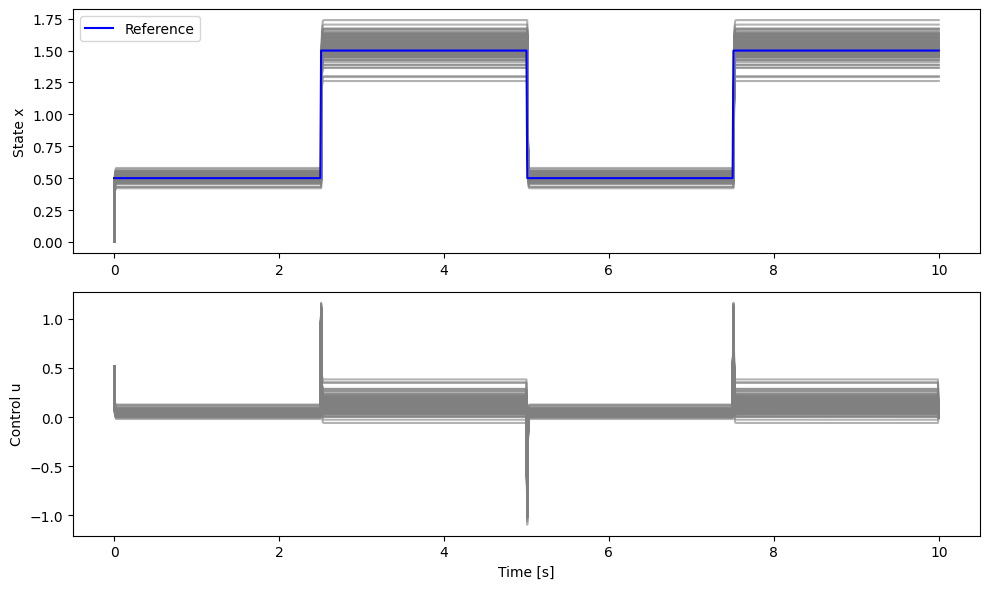

In [18]:
# Plot trajectories across set of (a,b) using this optimal L

X, U, t, ref = ref_tracking(a_set, b_set, k, opt_L)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
for xi in X:
    plt.plot(t, xi, color='gray', alpha=0.6)
plt.plot(t, ref, color='blue', label='Reference')
plt.ylabel("State x")
plt.legend()

plt.subplot(2, 1, 2)
for ui in U:
    plt.plot(t, ui, color='gray', alpha=0.6)
plt.xlabel("Time [s]")
plt.ylabel("Control u")

plt.tight_layout()
plt.show()


##### Integrator in the loop

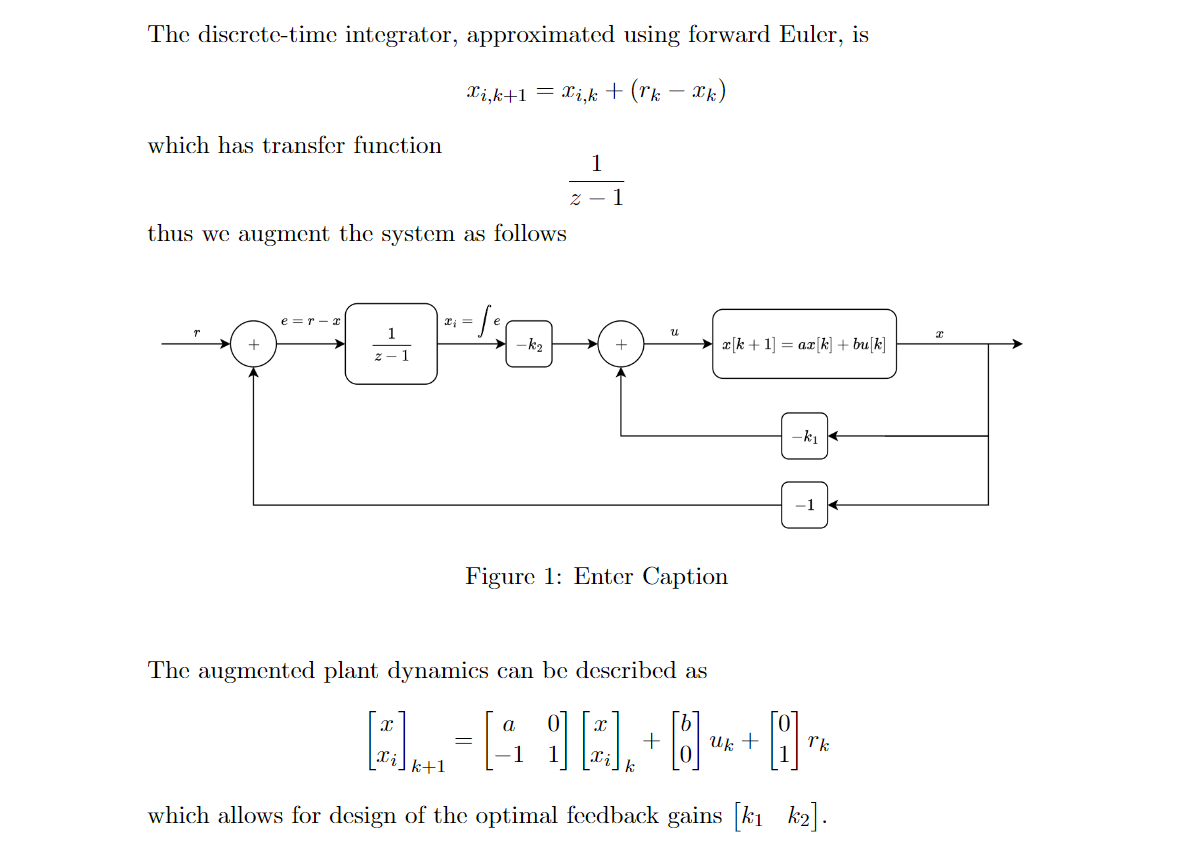

In [20]:
# Example of computing optimal kx, ki for a set of (a,b)
# kx: feedback gain on state x
# ki: feedback gain on error integral

N = 100
a_set = 0.92 + 0.1 * np.random.randn(N)
b_set = 0.1 + 0.001 * np.random.randn(N)
a_set = np.reshape(a_set, (N,1,1))
b_set = np.reshape(a_set, (N,1,1))

# Augment with integrator
A_set = np.array([ [[a.item(), 0], [-1, 1]] for a in a_set ])
B_set = np.array([ [[b.item()], [0]] for b in b_set ])
print(A_set.shape)
print(B_set.shape)

K = get_optimal_controller(A_set, B_set)
kx = K.squeeze()[0]
ki = K.squeeze()[1]

print(kx)
print(ki)

 Failed to compute reduced uncertainty region via convhull_peaucelle with 100 plant(s). Reverting to all_plants.


(100, 2, 2)
(100, 2, 1)
1.3316574012976194
-0.5733621514604375
